In [1]:
!pip install pot
!pip install torch
!pip install geomloss
!pip install wget
!pip install pyitlib


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pyitlib-0.2.3-py3-none-any.whl
  Using cached scikit-learn-0.24.0.tar.gz (7.4 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached future-1.0.0-py3-none-any.whl.metadata (4.0 kB)
Using cached future-1.0.0-py3-none-any.whl (491 kB)
Failed to build scikit-learn


  error: subprocess-exited-with-error
  
  × Building wheel for scikit-learn (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [26 lines of output]
      <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
      Partial import of sklearn during the build process.
      Traceback (most recent call last):
        File "C:\Users\zhossai3\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "C:\Users\zhossai3\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\zhossai3\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_i

In [2]:

pip install pyitlib

  Using cached pyitlib-0.2.3-py3-none-any.whl
  Using cached scikit-learn-0.24.0.tar.gz (7.4 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached future-1.0.0-py3-none-any.whl.metadata (4.0 kB)
Using cached future-1.0.0-py3-none-any.whl (491 kB)
Failed to build scikit-learn
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Building wheel for scikit-learn (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [26 lines of output]
      <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
      Partial import of sklearn during the build process.
      Traceback (most recent call last):
        File "c:\Users\zhossai3\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "c:\Users\zhossai3\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\zhossai3\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_i

In [1]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd

from geomloss import SamplesLoss

import ot

import os
import pickle as pkl
import copy

from sklearn.preprocessing import scale
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

from utils import *
from SoftImpute import softimpute, cv_softimpute
from DataSetLoader import dataset_loader, ground_truth
from SinkhornImputation import SinkhornImputation
from Sinkhorn_CMI import SinkhornImputation_CMI
from RR_imputer import RRimputer
import matplotlib.pyplot as plt

import argparse
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.debug("test")

torch.set_default_tensor_type('torch.DoubleTensor')

c:\Users\zhossai3\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\__init__.py:1144: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\tensor\python_tensor.cpp:434.)
  _C._set_default_tensor_type(t)


In [4]:
from sklearn.datasets import load_wine
ground_truth_numpy = scale(load_wine()['data']) #only taking the features
print(type(ground_truth_numpy))
print(np.max(ground_truth_numpy))
print(np.min(ground_truth_numpy))
print(np.mean(ground_truth_numpy))
print(np.median(ground_truth_numpy))
print(np.std(ground_truth_numpy))
print(ground_truth_numpy.shape)
ground_truth = torch.from_numpy(ground_truth_numpy)
print(ground_truth.isnan().sum())

<class 'numpy.ndarray'>
4.371372139554767
-3.6791622340370145
4.66735072755122e-16
-0.08109900443171775
1.0
(178, 13)
tensor(0)


In [5]:
#30% MCAR
np.random.seed(42)

p_macr30 = 0.30


mask_mcar30 = np.random.rand(*ground_truth.shape) < p_macr30  # True for missing values, false for others
data_mcar30 = np.copy(ground_truth)

# Apply the mask to set the selected values to NaN
data_mcar30[mask_mcar30] = np.nan

# Convert to a torch tensor
data_mcar30 = torch.from_numpy(data_mcar30)

# Calculate the percentage of missing values
missing_values_mcar30 = torch.isnan(data_mcar30)  # Create a boolean tensor where NaNs are True
missing_percentage_mcar30 = torch.sum(missing_values_mcar30).item() / data_mcar30.numel() * 100  # Calculate the percentage of NaNs
print(f"Percentage of missing values: {missing_percentage_mcar30:.2f}%")

Percentage of missing values: 30.73%


In [6]:
data_mcar30_numpy = data_mcar30.detach().cpu().numpy()

In [7]:
#sinkhorn
n_mcar30, d_mcar30 = data_mcar30.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar30 = pick_epsilon(data_mcar30)
print(epsilon_mcar30)

sk_imputer_mcar30 = SinkhornImputation_CMI(eps=epsilon_mcar30, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mcar30, sk_maes30mcar, sk_rmses30mcar,sk_loss_mcar30 = sk_imputer_mcar30.fit_transform(data_mcar30, verbose=True, report_interval=50, X_true=ground_truth)
#using numpy version of data
sk_imp_mcar30_numpy = sk_imp_mcar30.detach().cpu().numpy()

sk_mae_mcar30 = MAE(sk_imp_mcar30_numpy,ground_truth_numpy ,mask_mcar30)
sk_rmse_mcar30 = RMSE(sk_imp_mcar30_numpy, ground_truth_numpy,mask_mcar30)
print(sk_mae_mcar30,sk_rmse_mcar30)

0.39971389591590073


INFO:root:Iteration 0:	 Loss: 1.0065	 Validation MAE: 0.8472	RMSE: 1.0438
INFO:root:Iteration 50:	 Loss: 0.6909	 Validation MAE: 0.6674	RMSE: 0.8789
INFO:root:Iteration 100:	 Loss: 0.4925	 Validation MAE: 0.6340	RMSE: 0.8523
INFO:root:Iteration 150:	 Loss: 0.6640	 Validation MAE: 0.6219	RMSE: 0.8432
INFO:root:Iteration 200:	 Loss: 0.8093	 Validation MAE: 0.6125	RMSE: 0.8333
INFO:root:Iteration 250:	 Loss: 0.6220	 Validation MAE: 0.6048	RMSE: 0.8304
INFO:root:Iteration 300:	 Loss: 0.5920	 Validation MAE: 0.6012	RMSE: 0.8286
INFO:root:Iteration 350:	 Loss: 0.6449	 Validation MAE: 0.5973	RMSE: 0.8274
INFO:root:Iteration 400:	 Loss: 0.6558	 Validation MAE: 0.5986	RMSE: 0.8299
INFO:root:Iteration 450:	 Loss: 0.9208	 Validation MAE: 0.6032	RMSE: 0.8325
INFO:root:Iteration 500:	 Loss: 0.5921	 Validation MAE: 0.6069	RMSE: 0.8373
INFO:root:Iteration 550:	 Loss: 0.4751	 Validation MAE: 0.6062	RMSE: 0.8357
INFO:root:Iteration 600:	 Loss: 0.6553	 Validation MAE: 0.6028	RMSE: 0.8312
INFO:root:Itera

0.6141806104496348 0.8622598863254223


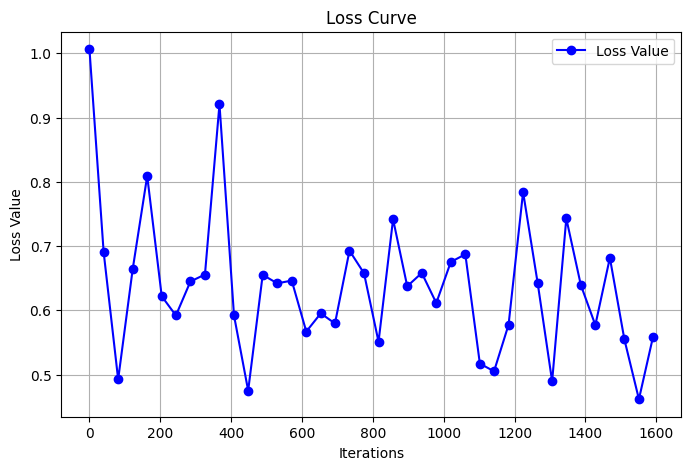

In [8]:
# Convert the list of losses to a NumPy array

iterations = np.linspace(0, 2000, 50).astype(int)



loss_values = sk_loss_mcar30


# Assuming cmi_penalty_history is also a list, convert it to a NumPy array
#cmi_penalty_history_numpy = np.array(cmi_penalty_history)

# Total loss calculation
#total_loss = sk_loss_mcar30_numpy + cmi_penalty_history_numpy
if len(loss_values) > len(iterations):
    loss_values = loss_values[:len(iterations)]
elif len(loss_values) < len(iterations):
    iterations = iterations[:len(loss_values)]



# Plotting
plt.figure(figsize=(8, 5))
plt.plot(iterations, loss_values, color='b', linestyle='-', marker='o', label="Loss Value")
plt.xlabel("Iterations")
plt.ylabel("Loss Value")
plt.title("Loss Curve")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



In [10]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
from sklearn.metrics import mutual_info_score

def conditional_mutual_information(X, Y, Z):
    """
    Compute Conditional Mutual Information I(X;Y | Z)
    using entropy-based definition.
    
    Parameters:
    X: numpy array (target variable)
    Y: numpy array (sensitive attribute)
    Z: numpy array (conditioning variable)
    
    Returns:
    CMI value (float)
    """
    def mutual_info(x, y):
        return mutual_info_score(x, y)

    # Compute MI(X, Y)
    mi_xy = mutual_info(X, Y)

    # Compute MI(X, Z)
    mi_xz = mutual_info(X, Z)

    # Compute MI(Y, Z)
    mi_yz = mutual_info(Y, Z)

    # Compute MI(X, Y | Z) using conditional MI formula:
    cmi = mi_xy - mi_xz - mi_yz
    return max(cmi, 0)  # Ensure non-negative values

# Step 3: Example Dataset (Adult Data)
data = {
    'Age': [25, 45, 35, 50, 23, 40, 60, 48, 33, 52],  # Target variable (X)
    'Gender': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],         # Sensitive Attribute (Y)
    'Race': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],           # Sensitive Attribute 2
    'Income': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]          # Conditioning Variable (Z)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Extract Variables
X = df['Age'].values          # Target variable
Y1 = df['Gender'].values      # Sensitive attribute 1
Y2 = df['Race'].values        # Sensitive attribute 2
Z = df['Income'].values       # Conditioning variable

# Compute CMI
cmi_Y1 = conditional_mutual_information(X, Y1, Z)
cmi_Y2 = conditional_mutual_information(X, Y2, Z)

print(f"Conditional Mutual Information (CMI) for Gender: {cmi_Y1:.4f}")
print(f"Conditional Mutual Information (CMI) for Race: {cmi_Y2:.4f}")


Conditional Mutual Information (CMI) for Gender: 0.0000
Conditional Mutual Information (CMI) for Race: 0.0000


In [12]:
!pip install numpy scipy sklearn


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


In [16]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from scipy.special import digamma

def knn_cmi(X, Y, Z, k=5):
    """
    Estimate Conditional Mutual Information (CMI) I(X;Y | Z) using K-Nearest Neighbors (KNN).
    
    Parameters:
    X, Y, Z : numpy arrays (continuous values)
        Target variable (X), Feature (Y), and Sensitive attribute (Z).
    k : int, default=5
        Number of nearest neighbors used in estimation.
    
    Returns:
    cmi : float
        Estimated conditional mutual information.
    """
    # Reshape to ensure 2D input
    X = X.reshape(-1, 1)
    Y = Y.reshape(-1, 1)
    Z = Z.reshape(-1, 1)

    data = np.column_stack((X, Y, Z))
    n = len(X)

    # Fit KNN
    knn = NearestNeighbors(n_neighbors=k + 1, metric='euclidean')
    knn.fit(data)
    radius = knn.kneighbors(data)[0][:, -1]

    # Compute neighbor counts
    knn_x = NearestNeighbors(n_neighbors=k + 1, metric='euclidean').fit(X)
    knn_y = NearestNeighbors(n_neighbors=k + 1, metric='euclidean').fit(Y)
    knn_z = NearestNeighbors(n_neighbors=k + 1, metric='euclidean').fit(Z)

    n_x = np.array([len(knn_x.radius_neighbors(X[i].reshape(1, -1), radius[i], return_distance=False)[0]) - 1 for i in range(n)])
    n_y = np.array([len(knn_y.radius_neighbors(Y[i].reshape(1, -1), radius[i], return_distance=False)[0]) - 1 for i in range(n)])
    n_z = np.array([len(knn_z.radius_neighbors(Z[i].reshape(1, -1), radius[i], return_distance=False)[0]) - 1 for i in range(n)])

    # Estimate CMI using digamma function
    cmi = np.mean(digamma(k) - digamma(n_x) - digamma(n_y) + digamma(n_z))
    
    return max(cmi, 0)  # Ensure non-negative CMI

# Example dataset with continuous variables
data = {
    'Age': [25, 45, 35, 50, 23, 40, 60, 48, 33, 52],  # Continuous target variable
    'Income': [30.5, 40.2, 35.7, 50.1, 28.4, 38.9, 60.3, 45.8, 33.6, 52.5],  # Continuous feature
    'Gender': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],  # Categorical sensitive attribute
    'Race': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # Categorical sensitive attribute
}

df = pd.DataFrame(data)

# Extract Variables
X = df['Age'].values        # Target variable (continuous)
Y1 = df['Income'].values    # Continuous feature
Z1 = df['Gender'].values    # Sensitive attribute (categorical)
Z2 = df['Race'].values      # Another sensitive attribute (categorical)

# Compute CMI
cmi_Y1 = knn_cmi(X, Y1, Z1)  # CMI between Age and Income given Gender
cmi_Y2 = knn_cmi(X, Y1, Z2)  # CMI between Age and Income given Race

print(f"Conditional Mutual Information (CMI) for Income | Gender: {cmi_Y1:.4f}")
print(f"Conditional Mutual Information (CMI) for Income | Race: {cmi_Y2:.4f}")


Conditional Mutual Information (CMI) for Income | Gender: 0.0731
Conditional Mutual Information (CMI) for Income | Race: 0.0731
